In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Dict, Tuple, List

# Data Import

In [2]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_49344/3257800236.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [3]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
data.shape

(506, 13)

In [5]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [7]:
X_train.shape

(354, 13)

In [8]:
y_test.shape

(152, 1)

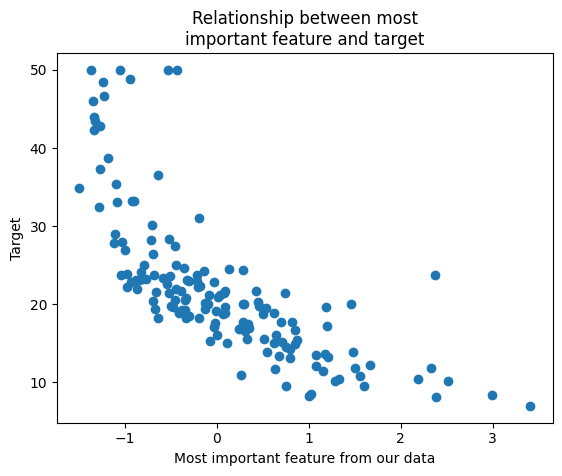

In [9]:
plt.scatter(X_test[:, 12], y_test)
plt.xlabel("Most important feature from our data")
plt.ylabel("Target")
plt.title("Relationship between most\nimportant feature and target");

# Manual Linear Regression (Single Variate)

### Hypothesis
$$H(\theta) = \theta_0 + \theta_1 \cdot x$$

Loss Function (MSE)
$$
J(\theta) = \frac{1}{2n} \sum_{i=1}^{n}{(y_i - \hat{y_i})^2}
$$

Where $y_i$ is the Hypothesis (predicted value)

In [10]:
def forward_pass_regression(X, W):
    return np.dot(X, W)

In [11]:
def mse_loss(y_pred, y_true):
    return np.mean(np.power(y_pred - y_true, 2))

In [12]:
def backward_pass_regression(y_pred, W, y_true, X, alpha):
    gradient = -2 / X.shape[0] * np.dot(X.T, (y_true - y_pred))
    W = W - alpha * gradient
    return W

In [13]:
def generate_batch(X, 
                   y,
                   start: int = 0,
                   batch_size: int = 50):
    '''
    Generate batch from X and y, given a start position
    '''
    assert X.ndim == y.ndim == 2, \
    "X and Y must be 2 dimensional"

    if start + batch_size > X.shape[0]:
        batch_size = X.shape[0] - start
    
    X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]
    
    return X_batch, y_batch

In [14]:
def train(X, 
          y, 
          n_iter: int = 1000,
          learning_rate: float = 0.01,
          batch_size: int = 100,
          seed: int = 1) -> None:
    if seed:
        np.random.seed(seed)
    start = 0
    # Ensure X is 2D
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    # Create a column of ones for intercept term
    X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])
    W = np.random.randn(X_with_intercept.shape[1], 1)
    # Generate batch
    if start >= X.shape[0]:
        X, y = permute_data(X, y)
        start = 0
    
    X_batch, y_batch = generate_batch(X_with_intercept, y, start, batch_size)
    start += batch_size
    losses = []
    for i in range(n_iter):
        forward = forward_pass_regression(X_batch, W)
        losses.append(mse_loss(forward, y_batch))
        W = backward_pass_regression(forward, W, y_batch, X_batch, learning_rate)
    return losses, W

In [15]:
def validate_model(X, y, W):
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    # Add intercept term
    X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Make predictions
    y_pred = forward_pass_regression(X_with_intercept, W)
    
    # Calculate loss
    loss = mse_loss(y_pred, y)
    
    return loss

In [16]:
n_iter = 10000
losses, W = train(X_train, y_train,n_iter = 10000,
                   learning_rate = 0.001,
                   batch_size= 10000,
                   seed=180708)
preds = forward_pass_regression(np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1), W)

In [17]:
validation_loss = validate_model(X_test, y_test, W)
print("Validation MSE:", validation_loss)

Validation MSE: 25.53334898988666


In [18]:
from sklearn.metrics import r2_score

def compute_r2_score(y_true, y_pred):
    return r2_score(y_true, y_pred)

compute_r2_score(y_test, preds)

0.7191872608328123

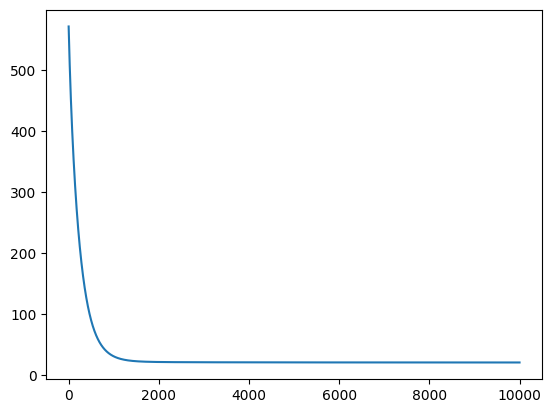

In [19]:
plt.plot(list(range(n_iter)), losses);

(6.0, 51.0)

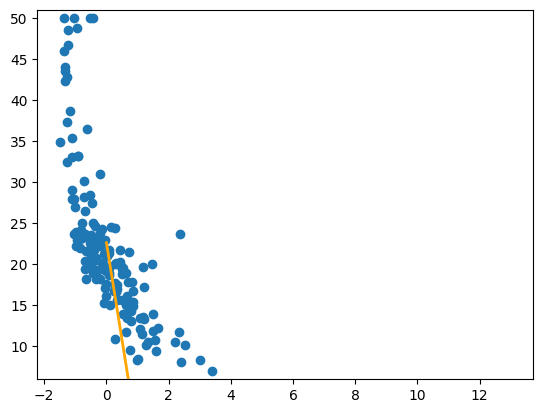

In [20]:
plt.scatter(X_test[:, 12], y_test)
plt.plot(np.array(W), linewidth=2, c='orange')
plt.ylim([6, 51])

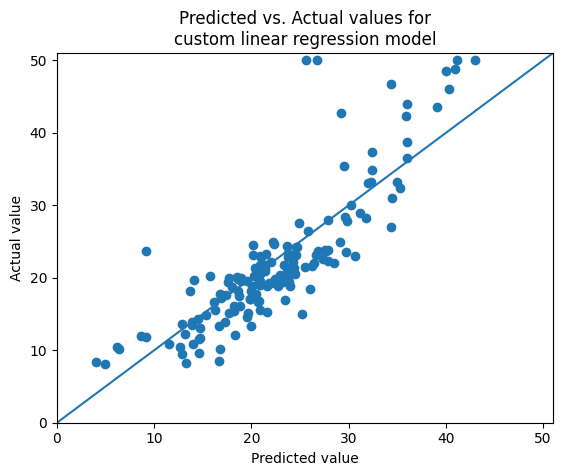

In [21]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom linear regression model");
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51]);